# Closed Form Regression

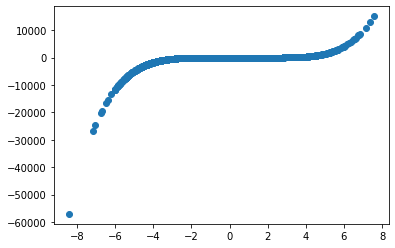

In [49]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(75)

# number of sample of target function
N = 10000

# x values of samples
X_sample = np.random.normal(loc=0.0, scale=2, size=N)

# samples of target function with random normal noise
y_sample = X_sample**5 - 3 * X_sample**4 + 4 * X_sample**2 + 2 * X_sample + 1 + \
    np.random.normal(loc=0, scale=0.05, size=N)

plt.scatter(X_sample, y_sample)

X0 = np.ones(y_sample.shape[0])
# hypotesis: quintic function, 6 parameters
X = np.stack((X0, X_sample, X_sample**2, X_sample**3, X_sample**4, X_sample**5), axis=1)


array([ 1.00078692e+00,  1.99965755e+00,  3.99987169e+00,  4.43032447e-05,
       -2.99999929e+00,  9.99999635e-01])

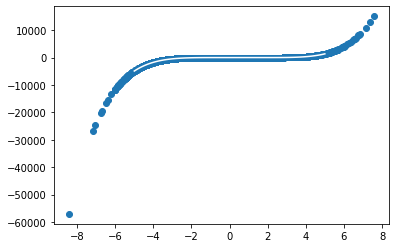

In [56]:
# closed-form regression
w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)),
           np.transpose(X)), y_sample)

plt.scatter(X_sample, y_sample)
x_grid = np.linspace(-5, 5, 100)
y_grid = w[0] + w[1] * x_grid + w[2] * x_grid**2 + w[3] * x_grid**3 + w[4] * x_grid**4 + w[5] * x_grid**5  
plt.plot(x_grid, y_grid, c='w')
w

# Regression with SGD

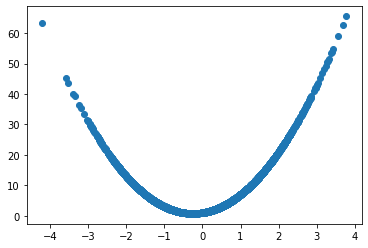

In [81]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(75)

# number of sample of target function
N = 10000

# x values of samples
X_sample = np.random.normal(loc=0.0, scale=1, size=N)

# samples of target function with random normal noise
y_sample = 4 * X_sample**2 + 2 * X_sample + 1 + \
    np.random.normal(loc=0, scale=0.05, size=N)

plt.scatter(X_sample, y_sample)

X0 = np.ones(y_sample.shape[0])
# hypotesis: quartic function, 5 parameters
X = np.stack((X0, X_sample, X_sample**2), axis=1)
w = np.random.uniform(low=-0.1, high=0.1, size=3)
y = y_sample[:]


In [82]:
def error_w(X, y, w):
    return 0.5 * np.sum(np.square(y - np.dot(X, w)))


error_w(X, y_sample, w)


312187.24203097477

number of epochs = 10
error = 12.406528408796579


array([1.00036177, 2.00097616, 3.99878417])

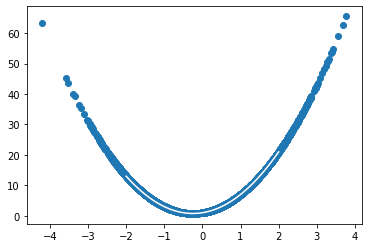

In [87]:
# re-initialization of weights for multiple runs of this block of code
w = np.random.uniform(low=-0.1, high=0.1, size=3)

# SGD method for minimizing error function

# max number of training epochs
max_epochs = 10

# size of batches for mini-batch learning
batch_size = 10

# learning rate 0 < eta <= 1
eta = 1e-3

# error arrays for logging
total_error = np.zeros(max_epochs + 1)
total_num_errors = np.zeros(max_epochs + 1)

for epoch in range(max_epochs):
    total_error[epoch] = error_w(X, y, w)
    total_num_errors[epoch] = sum(y * np.sign(np.dot(X, w)) < 0)

    rand_perm = np.random.permutation(y.shape[0])
    X = X[rand_perm, :]
    y = y[rand_perm]

    for j in range(0, y.shape[0], batch_size):
        x_batch = X[j:j + batch_size, :]
        y_batch = y[j:j + batch_size]

        error = y_batch - np.dot(x_batch, w)

        w += eta * np.dot(np.transpose(x_batch), error)

total_error[epoch + 1] = error_w(X, y, w)
total_num_errors[epoch + 1] = sum(y * np.sign(np.dot(X, w)) < 0)

print(f"number of epochs = {epoch + 1}")
print(f"error = {total_error[-1]}")

plt.scatter(X_sample, y_sample)

x_grid = np.linspace(-2, 2, 100)
y_grid = sum([w[i] * x_grid**i for i in range(len(w))])
plt.plot(x_grid, y_grid, c='w')
w

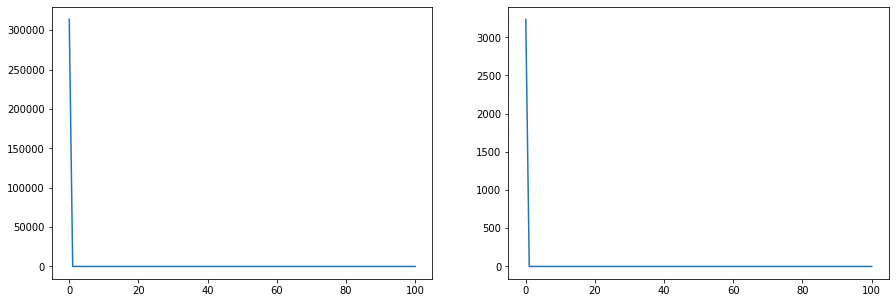

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].plot(range(sum(total_error > 0)), total_error[total_error > 0])
axs[1].plot(range(sum(total_error > 0)), total_num_errors[total_error > 0])
